In [17]:
#importing necessary libraries
import pandas as pd 
from sklearn import preprocessing
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

%matplotlib inline

In [5]:
#loading the dataset
bank=pd.read_csv('bank-full.csv')
bank.head() #dataframe is created

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
#checking missing values in the dataframe
bank.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#shape of the data
bank.shape

(45211, 17)

In [8]:
#univariate analysis
#mean, median,mode,min,max and quantities
bank.describe() # this implies that the age is directly propotional to the balance and not much affected by the campaigns but affected by previous customers

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
#categorical features
bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [7]:
bank['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
36    1806
30    1757
37    1696
39    1487
38    1466
40    1355
41    1291
42    1242
45    1216
29    1185
46    1175
43    1161
44    1136
47    1088
28    1038
48     997
49     994
50     939
51     936
52     911
27     909
53     891
57     828
54     811
55     806
      ... 
67      54
71      54
72      52
20      50
77      44
73      44
69      44
75      39
74      37
68      36
19      35
76      32
80      31
78      30
79      25
83      22
82      19
81      17
18      12
84       9
86       9
85       5
87       4
89       3
88       2
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64

In [10]:
bank['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [11]:
bank['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [12]:
bank['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

NameError: name 'plt' is not defined

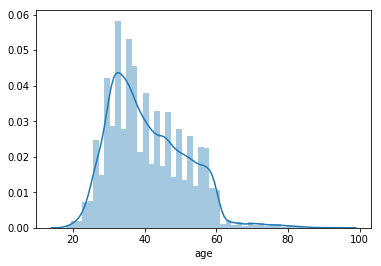

In [18]:
sns.distplot(bank['age'])


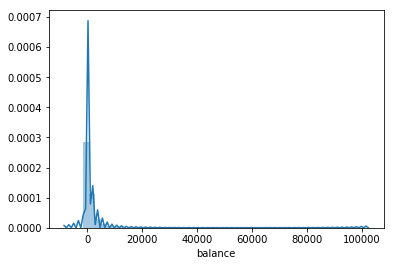

In [19]:
sns.distplot(bank['balance'])

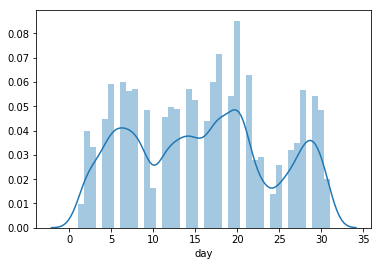

In [20]:
sns.distplot(bank['day'])

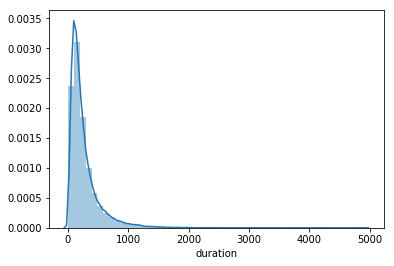

In [21]:
sns.distplot(bank['duration'])

In [22]:
#datatype of all the attributes in the csv file
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


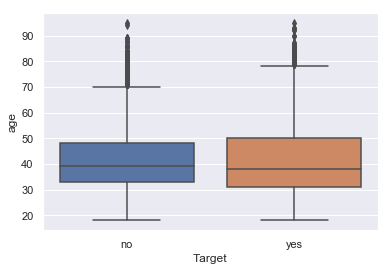

In [27]:
#Multivariate Analysis
sns.boxplot(bank['Target'],bank['age'])

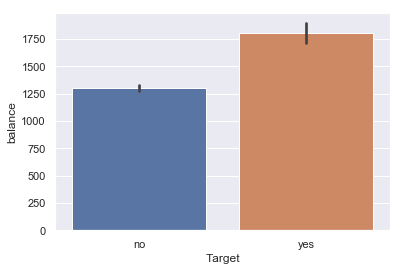

In [37]:
sns.barplot(bank['Target'],bank['balance'])

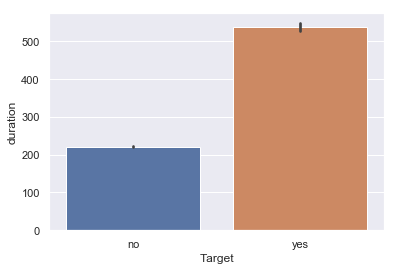

In [38]:
sns.barplot(bank['Target'],bank['duration'])

In [4]:
#loading data in dataframe(Pandas)
data_bank=pd.read_csv('bank-full.csv')

In [5]:
data_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
#for splitting of the data 70:30
y=data_bank.age
x=data_bank.drop('age',axis=1)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train.head()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
9860,housemaid,married,secondary,no,3034,no,no,unknown,9,jun,206,2,-1,0,unknown,no
40122,admin.,married,secondary,no,897,no,no,cellular,5,jun,397,1,-1,0,unknown,yes
5491,admin.,divorced,secondary,no,687,yes,yes,unknown,23,may,229,1,-1,0,unknown,no
43868,technician,single,secondary,no,1165,no,no,cellular,4,jun,204,2,183,3,success,yes
6060,management,single,tertiary,no,337,yes,no,unknown,26,may,777,5,-1,0,unknown,no


In [13]:
x_train.shape

(31647, 16)

In [14]:
x_test.shape

(13564, 16)

In [15]:
y_train.shape

(31647L,)

In [16]:
y_test.shape

(13564L,)

In [31]:
#preparing models and seeing their performances
models = []
models.append(('KNN', KNeighborsClassifier())) #lazy learner
models.append(('NB', GaussianNB())) # most basic
models.append(('SVM', SVC()))
models.append(('CART', DecisionTreeClassifier()))

In [50]:
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC() # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)





ValueError: could not convert string to float: no

In [51]:
import matplotlib.pyplot as plt 

In [52]:
data = pd.read_csv('bank-full.csv') 
print(data) 

       age            job   marital  education default  balance housing loan  \
0       58     management   married   tertiary      no     2143     yes   no   
1       44     technician    single  secondary      no       29     yes   no   
2       33   entrepreneur   married  secondary      no        2     yes  yes   
3       47    blue-collar   married    unknown      no     1506     yes   no   
4       33        unknown    single    unknown      no        1      no   no   
5       35     management   married   tertiary      no      231     yes   no   
6       28     management    single   tertiary      no      447     yes  yes   
7       42   entrepreneur  divorced   tertiary     yes        2     yes   no   
8       58        retired   married    primary      no      121     yes   no   
9       43     technician    single  secondary      no      593     yes   no   
10      41         admin.  divorced  secondary      no      270     yes   no   
11      29         admin.    single  sec

In [61]:
x = data.iloc[:, 0:1].values  
print(x) 


[[58]
 [44]
 [33]
 ...
 [72]
 [57]
 [37]]


In [63]:
y = data.iloc[:, 5].values
print(y)

[2143   29    2 ... 5715  668 2971]


In [64]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(x, y)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

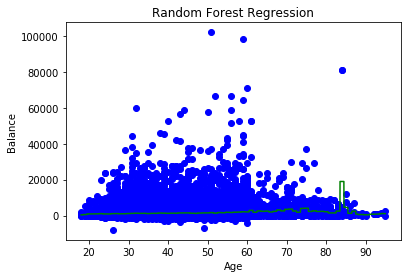

In [66]:
import numpy as np
# Visualising the Random Forest Regression results 
  
# arange for creating a range of values 
# from min value of x to max  
# value of x with a difference of 0.01  
# between two consecutive values 
X_grid = np.arange(min(x), max(x), 0.01)  
  
# reshape for reshaping the data into a len(X_grid)*1 array,  
# i.e. to make a column out of the X_grid value                   
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# Scatter plot for original data 
plt.scatter(x, y, color = 'blue')   
  
# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid),  
         color = 'green')  
plt.title('Random Forest Regression') 
plt.xlabel('Age') 
plt.ylabel('Balance') 
plt.show()